# Multiple Linear Regression Model for BoomBikes

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal: 

Need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Meta Information of the Variables:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Data Extraction and Review

In [1313]:
#Importing required packages and Modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns',100)

In [1314]:
# Importing the Sample dataset
raw=pd.read_csv('day.csv')

In [1315]:
# Record Review
raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1316]:
# Dimension of the dataset
raw.shape

(730, 16)

- We have observed that this sample dataset provided for analysis has 730 rows and 16 columns

In [1317]:
# Information about the Variables
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning and Manipulation

###### Checkpoints:

- Fix missing values if the datset has any
- Remove duplicate values if the dataset has any
- Remove rows and columns that are insignificant for the analysis
- Standardise & Fix invalid values if any
- Validate and correct dtype of variables if applicable
- Filter data if required

##### Removing duplicate Records :

In [1318]:
#Removing duplicate Records
raw1=raw.drop_duplicates()

#Checking number of Duplicates
if raw.shape[0] == raw1.shape[0]:  
    print('Observed no duplicates')
else :
    dup=raw.shape[0]-raw1.shape[0]
    print('Observed {} Duplicate Records'.format(dup))

Observed no duplicates


##### Data Imputation and Null value cleanup :

In [1319]:
# Checking for Null Values
(raw1.isnull().sum())*100/len(raw1)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- The data has no null values across all the columns, No Data imputation steps required.

#### Removing variables that are not Significant for the Model and Analysis :

- instant: record index -> Index of a record which will not support any form of analysis to the given problem statement.
- casual & registered -> Can be removed since the problem statement clearly mentioned us to take total count of users instead of casual or registered users.

In [1320]:
# Insignificant columns
notsignificant=['instant','casual','registered']
raw2=raw1.drop(notsignificant,axis=1)

In [1321]:
print('Columns That were removed: \n')
for col in raw:
    if col not in raw2:
        print('*',  col)
        

Columns That were removed: 

* instant
* casual
* registered


In [1322]:
raw2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1323]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 79.8+ KB


##### Convert Datatype of dteday to datetime series:

In [1324]:
raw2['dteday']=pd.to_datetime(raw2['dteday'])

## Derived Metrics - Creating Categorical Fields for the Analysis:

<div class="alert alert-block alert-success">
We have created the below Derived metrics and modified the data type of date variables, which can be later used in the dummy value creation for the sample dataset. 

Doing this step just to make the Variable name more <b>readable during the analysis.</b></b>    
</div>

##### weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
##### season: 
- 1:spring
- 2:summer
- 3:fall
- 4:winter

##### yr :
- 0: 2018
- 1: 2019

##### holiday:
- 1: Yes
- 0: No

##### workingday:
- 1: Yes
- 0: No

##### Weekday:
- 0: sunday
- 1: monday
- 2: tuesday
- 3: wednesday
- 4: thursday
- 5: friday
- 6: saturday

##### Mnth:

- 1: Jan
- 2: Feb
- 3: mar
- 4: apr
- 5: may
- 6: jun
- 7: jul
- 8: aug
- 9: sep
- 10: oct
- 11: nov
- 12: dec


In [1325]:
raw2['season']=raw2[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

#Converting Weather in to a Categorical Variable
raw2['weathersit']=raw2[['weathersit']].apply(lambda x: 
                                                   x.map({1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'}))
#Converting all the periodic values in to categorical variables
raw2['yr']=raw2[['yr']].apply(lambda x: x.map({0:2018,1:2019}))
raw2['holiday']=raw2[['holiday']].apply(lambda x: x.map({1:'yes',0:'no'}))
raw2['workingday']=raw2[['workingday']].apply(lambda x: x.map({1:'yes',0:'no'}))
raw2['weekday']=raw2[['weekday']].apply(lambda x: x.map({0:'sunday',1:'monday',2:'tuesday',
                                                         3:'wednesday',4:'thursday',5:'friday',6:'saturday'}))
raw2['mnth']=raw2[['mnth']].apply(lambda x: x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                  ,9:'sep',10:'oct',11:'nov',12:'dec'}))



In [1326]:
raw2['yr']=raw2['yr'].astype('object')

In [1327]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 79.8+ KB


In [1328]:
raw2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,jan,no,saturday,no,mist,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,jan,no,sunday,no,mist,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,jan,no,monday,yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,jan,no,tuesday,yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,jan,no,wednesday,yes,clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Analysis 

#### Distribution of Data in the given variables :

In [1329]:
for col in raw2:
    print(col, ': \n')
    print(raw2[col].value_counts(),'\n')

dteday : 

2018-01-01    1
2019-04-25    1
2019-04-27    1
2019-04-28    1
2019-04-29    1
2019-04-30    1
2019-01-05    1
2019-02-05    1
2019-03-05    1
2019-04-05    1
2019-05-05    1
2019-06-05    1
2019-07-05    1
2019-08-05    1
2019-09-05    1
2019-10-05    1
2019-11-05    1
2019-12-05    1
2019-05-13    1
2019-05-14    1
2019-05-15    1
2019-04-26    1
2019-04-24    1
2019-05-17    1
2019-04-23    1
2019-04-04    1
2019-05-04    1
2019-06-04    1
2019-07-04    1
2019-08-04    1
2019-09-04    1
2019-10-04    1
2019-11-04    1
2019-12-04    1
2019-04-13    1
2019-04-14    1
2019-04-15    1
2019-04-16    1
2019-04-17    1
2019-04-18    1
2019-04-19    1
2019-04-20    1
2019-04-21    1
2019-04-22    1
2019-05-16    1
2019-05-18    1
2019-02-07    1
2019-10-06    1
2019-12-06    1
2019-06-13    1
2019-06-14    1
2019-06-15    1
2019-06-16    1
2019-06-17    1
2019-06-18    1
2019-06-19    1
2019-06-20    1
2019-06-21    1
2019-06-22    1
2019-06-23    1
2019-06-24    1
2019-06-25   

#### Observation:
<div class="alert alert-block alert-success">
    
- By looking in to the value counts across all the variables it is clear that the variables don't have any miscelleneous or insignificant data.
    
</div>

In [1330]:
raw2.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Outlier Analysis:

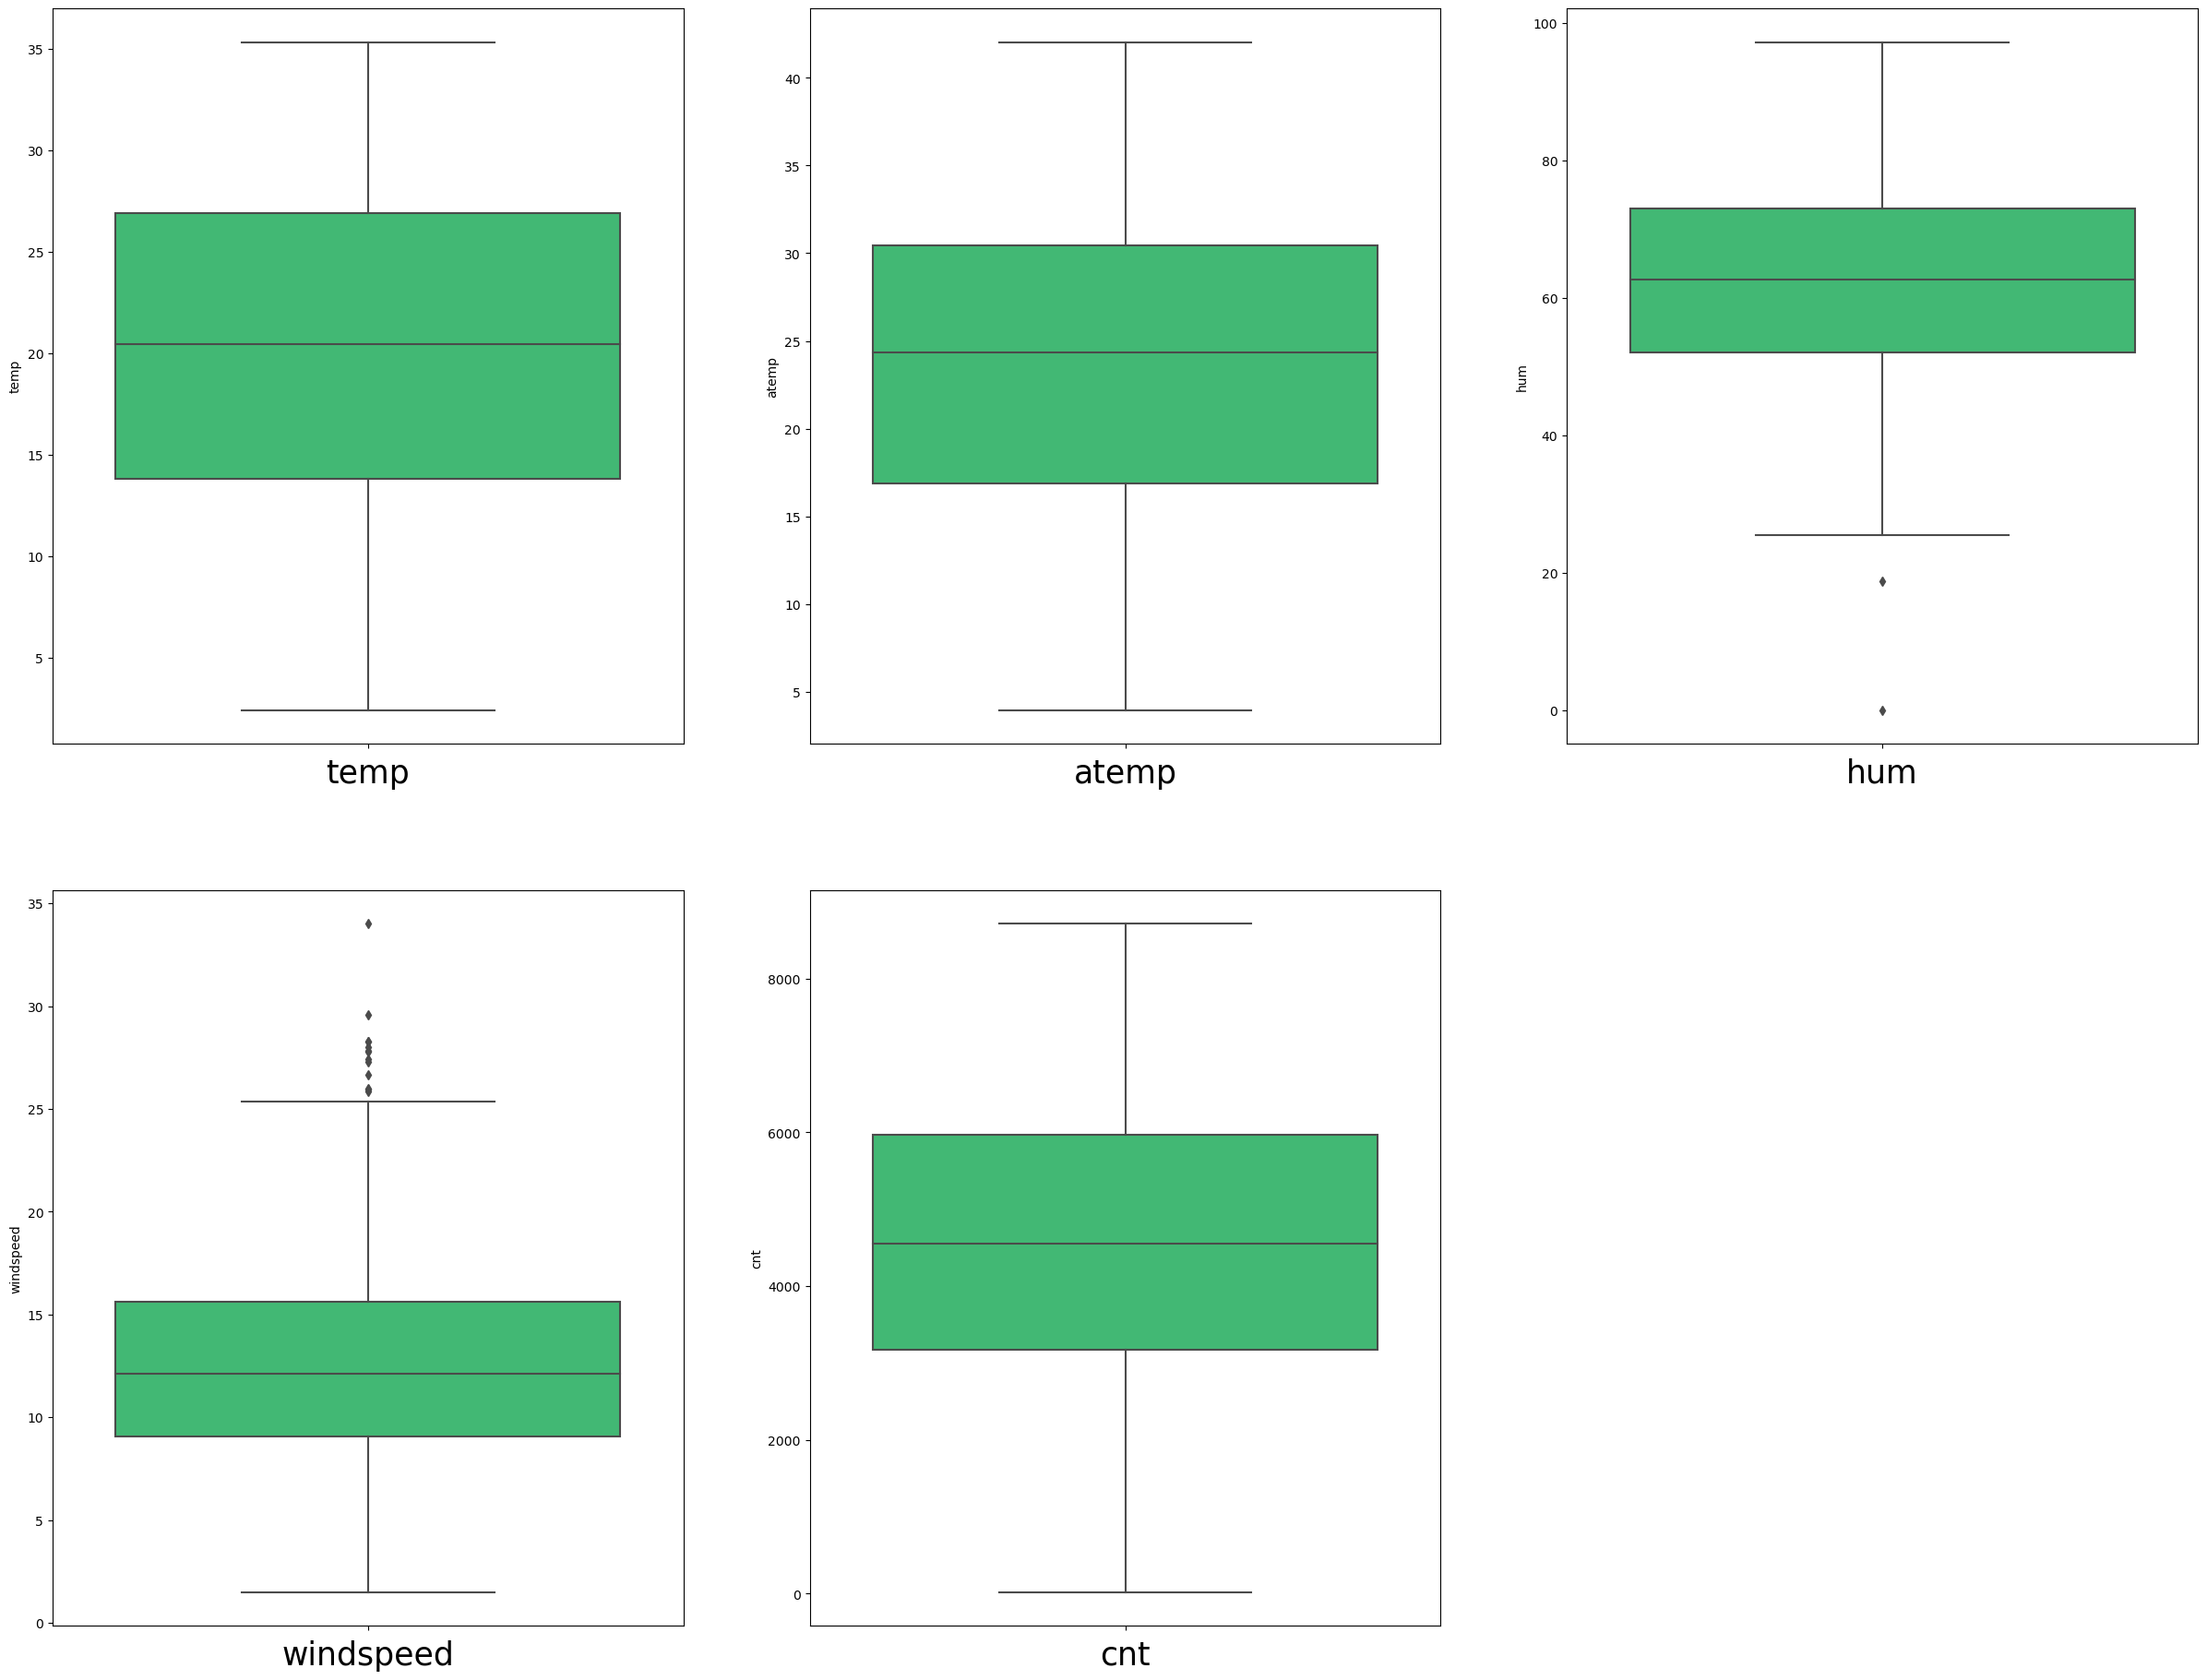

In [1331]:
import math
axis=1
rows=math.ceil(raw2.shape[1]/3)
rows
plt.figure(figsize=(30,60))
i=1

for col in raw2:
    if (raw2[col].dtype =='int64') | (raw2[col].dtype =='float64'):
        plt.subplot(rows,3,i)
        sns.boxplot(y=raw2[col])
        plt.xlabel(col,fontsize=25)
        i=i+1        
plt.show()

#### Observations : 


<div class="alert alert-block alert-success">

- The Variables does'nt seems to have any potential outliers that could cause any potential effect to the observation.

- Eventhough windspeed & humidity seems to have some outliers outside of the max/min cap range there might be a chance that it could be the behaviour of the actual data and removibng this outliers may end up in loosing some predective power in these variables.
</div>

##### Deriving satistics about the variables

In [1332]:
raw2.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


# Univariate Analysis : 

### Analysis of Categorical Variable:

In [1333]:
cat_var=[]
print('Categorical Variables for Analysis : \n')
for col in raw2:
    if raw2[col].dtype=='object':
        cat_var.append(col)
        print('*', col)

        
print('\nIn total we have {} Categorical Variables for the Analysis. \n'.format(len(cat_var)))

Categorical Variables for Analysis : 

* season
* yr
* mnth
* holiday
* weekday
* workingday
* weathersit

In total we have 7 Categorical Variables for the Analysis. 



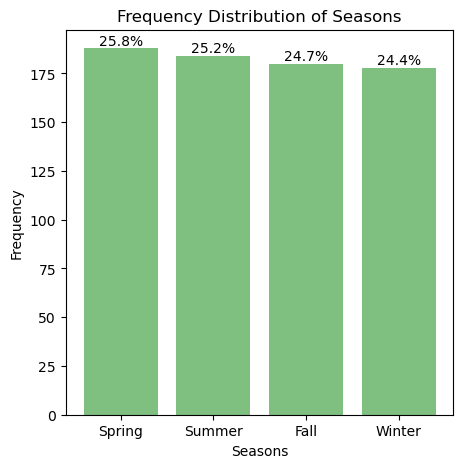

In [1334]:
plt.figure(figsize=(5,5))

# Count the frequency of each season category
season_counts = raw2['season'].value_counts()

season_percentages = (season_counts / season_counts.sum()) * 100

# Create a bar chart
plt.bar(season_counts.index, season_counts.values,color='green', alpha=0.5)
# Label each bar with its corresponding season category
plt.xticks(season_counts.index, ['Spring', 'Summer', 'Fall', 'Winter'])

# Label each bar with its corresponding season category and percentage value
for i, count in enumerate(season_counts.values):
    plt.text(i, count, f'{season_percentages[i]:.1f}%', ha='center', va='bottom')


plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Seasons')
plt.show()

#### Observations:

<div class="alert alert-block alert-success">
    
Across the year spring and summer is the most occured seasons with the below percentage opf distributions

- 25.8%
- 25.2%
    
</div>

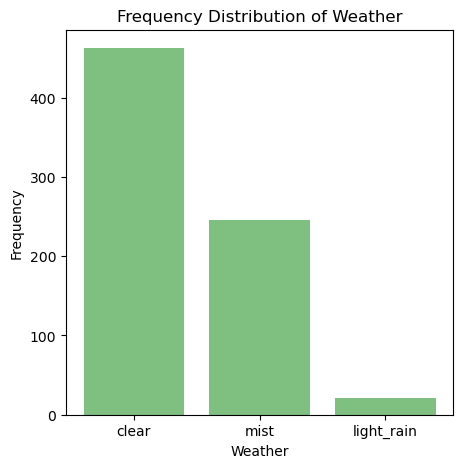

In [1335]:
plt.figure(figsize=(5,5))


# Count the frequency of each season category
weather_counts = raw2['weathersit'].value_counts()

weather_percentages = (weather_counts / weather_counts.sum()) * 100

# Create a bar chart
plt.bar(weather_counts.index, weather_counts.values,color='green',alpha=0.5)

# Label each bar with its corresponding season category
#plt.xticks(season_counts.index, ['Spring', 'Summer', 'Fall', 'Winter'])

plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Weather')
plt.show()

#### Observations :

<div class="alert alert-block alert-success">

- Across the years most of the times there seems to be clear weather with the overalall weather distribution in the data Clear weather seems to have 63.4% of distribution
- 33.7% mist distribution states that there some moderate chances of having misty weather across the years
- we don't have much distributions for data havingh light rain which sates that there very less chances of having light rain season.
    </div>

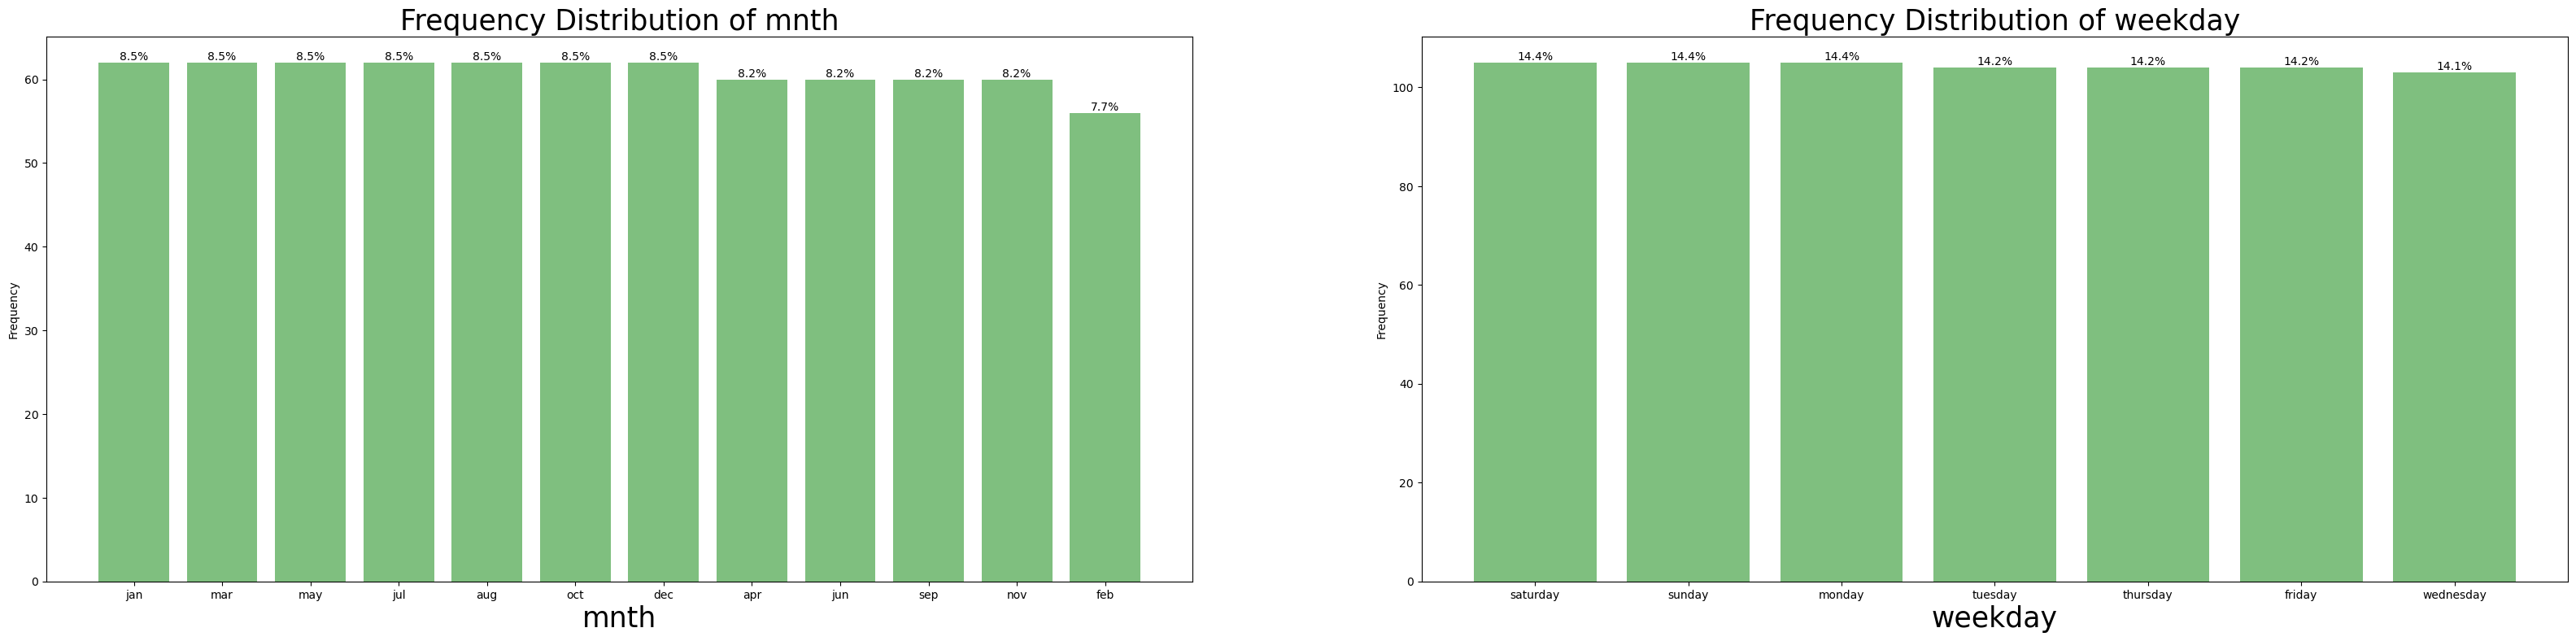

In [1336]:
i=1
j=1
plt.figure(figsize=(40,40))
for col in raw2:
    if (raw2[col].dtype=='object') & (raw2[col].nunique()>4):
        df_c=raw2[col].value_counts()
        df_per=(df_c/df_c.sum()) * 100
        plt.subplot(4,2,i)
        plt.bar(df_c.index,df_c.values,color='green', alpha=0.5)
        plt.xlabel(col,fontsize=25)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of {}'.format(col), fontsize=25)
        # Label each bar with its corresponding season category and percentage value
        for j, count in enumerate(df_c.values):
             plt.text(j, count, f'{df_per[j]:.1f}%', ha='center', va='bottom')

        i=i+1
plt.show()



#### Observations:

<div class="alert alert-block alert-success">
    
- <b> mnth: </b> The frequency distribution of month is consnatnt across most of the months except apr, jun,sep,nov,feb where the distibution seems to be a bit lower.  
- <b> Weekday: </b> Data is distributed consistenly cross all the weekdays.       
    
</div>

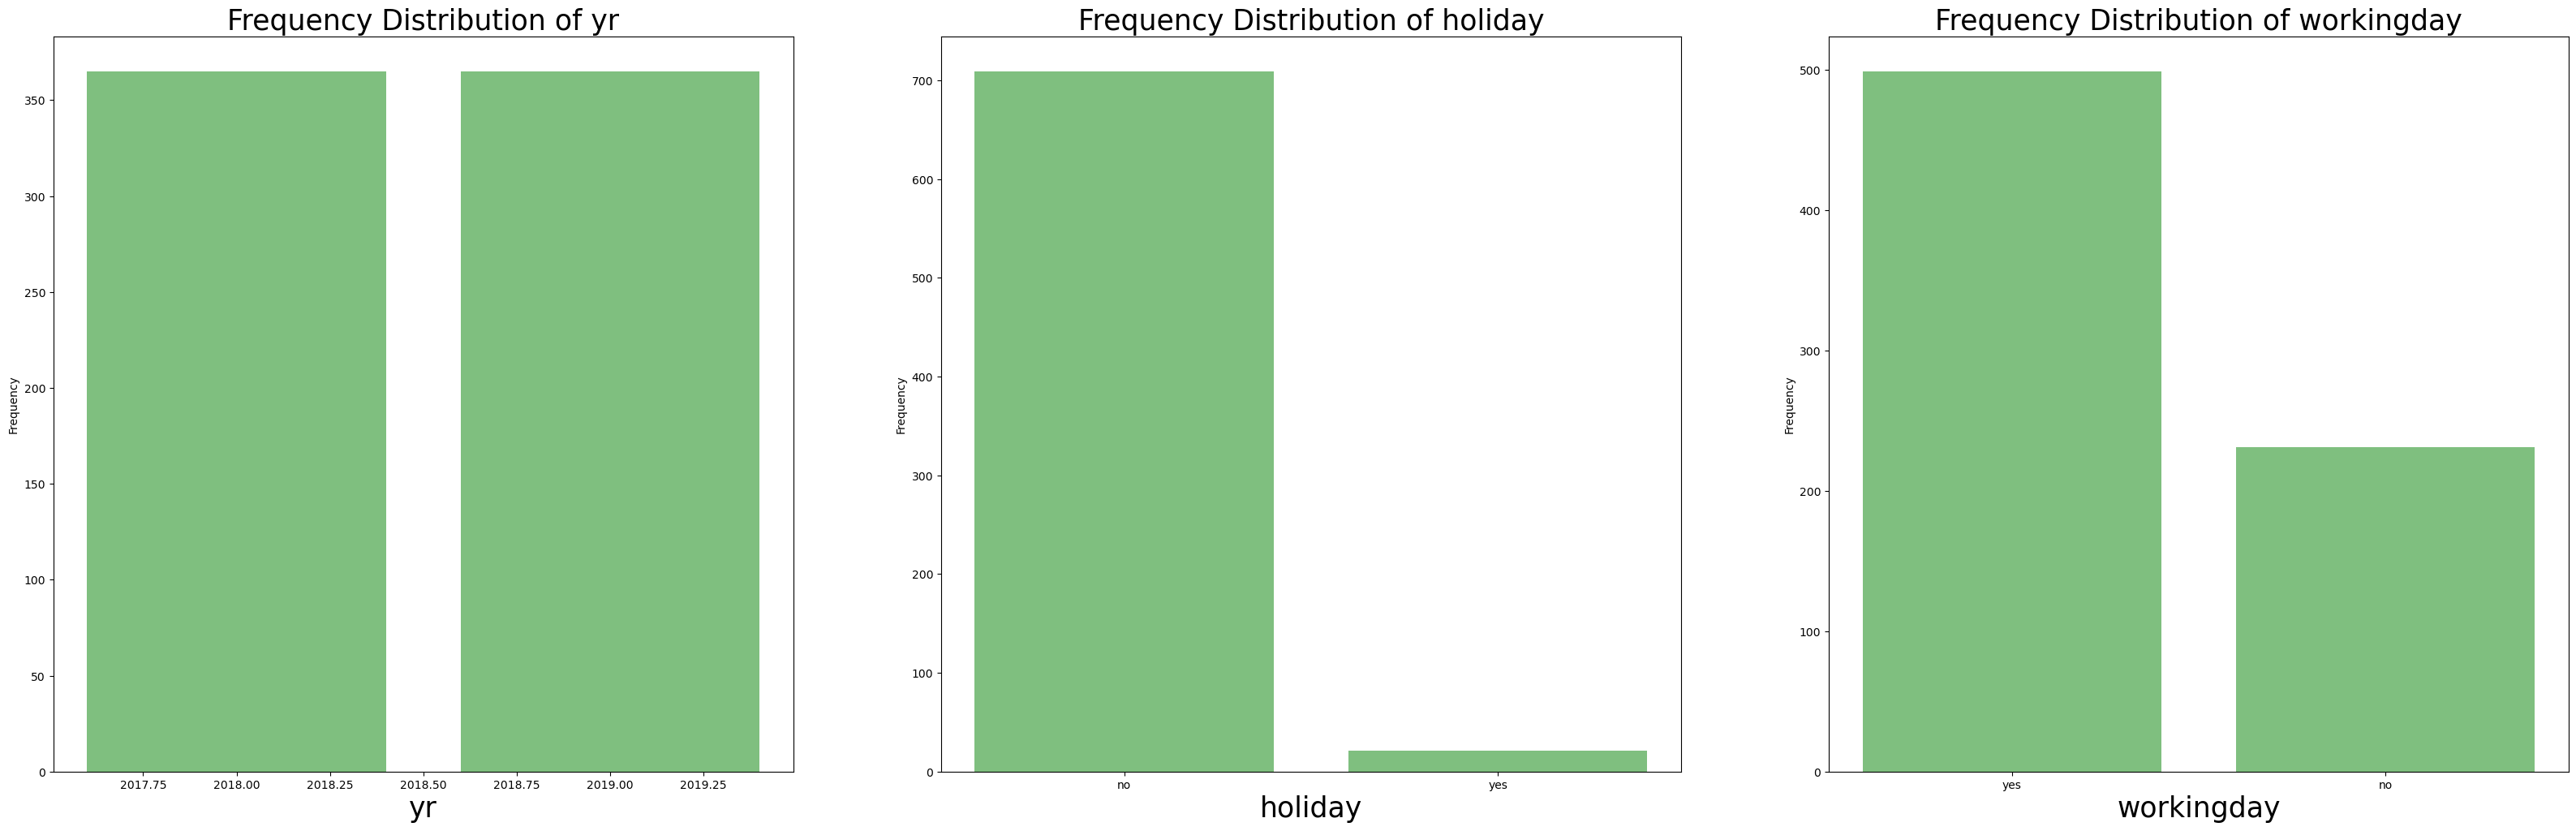

In [1337]:
i=1
k=1
plt.figure(figsize=(40,40))
for col in raw2:
    if (raw2[col].dtype=='object') & (raw2[col].nunique()==2):
        df_c=raw2[col].value_counts()
        df_per=(df_c/df_c.sum()) * 100
        plt.subplot(3,3,i)
        plt.bar(df_c.index,df_c.values,color='green', alpha=0.5)
        plt.xlabel(col,fontsize=25)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of {}'.format(col), fontsize=25)
        # Label each bar with its corresponding season category and percentage value
       

        i=i+1
plt.show()



#### Observations:

<div class="alert alert-block alert-success">
    
- <b> Seson: </b> fall season seems to have higher distribution rather.  
- <b> Holiday & workingday: </b> distribution of holiday is lesser than working days in the given dataset.       
    
</div>

## Univariate Analysis of Numeric Variables:

In [1338]:
num_var=[]
print('Numeric Variables for Analysis : \n')
for col in raw2:
    if raw2[col].dtype!='object':
        cat_var.append(col)
        print('*', col)
        num_var.append(col)
        
print('\nIn total we have {} Numeric Variables for the Analysis. \n'.format(len(num_var)))

Numeric Variables for Analysis : 

* dteday
* temp
* atemp
* hum
* windspeed
* cnt

In total we have 6 Numeric Variables for the Analysis. 



#### Frequency Distribution Analysis:

<div class="alert alert-block alert-success">
    We can exclude <b>dteday</b>. Since we already have the required derived metric from that for the Analysis.
</div>

In [1339]:
num_ex2=['yr','holiday','workingday','year','weekday','mnth']
num_ex1.extend(num_ex2)


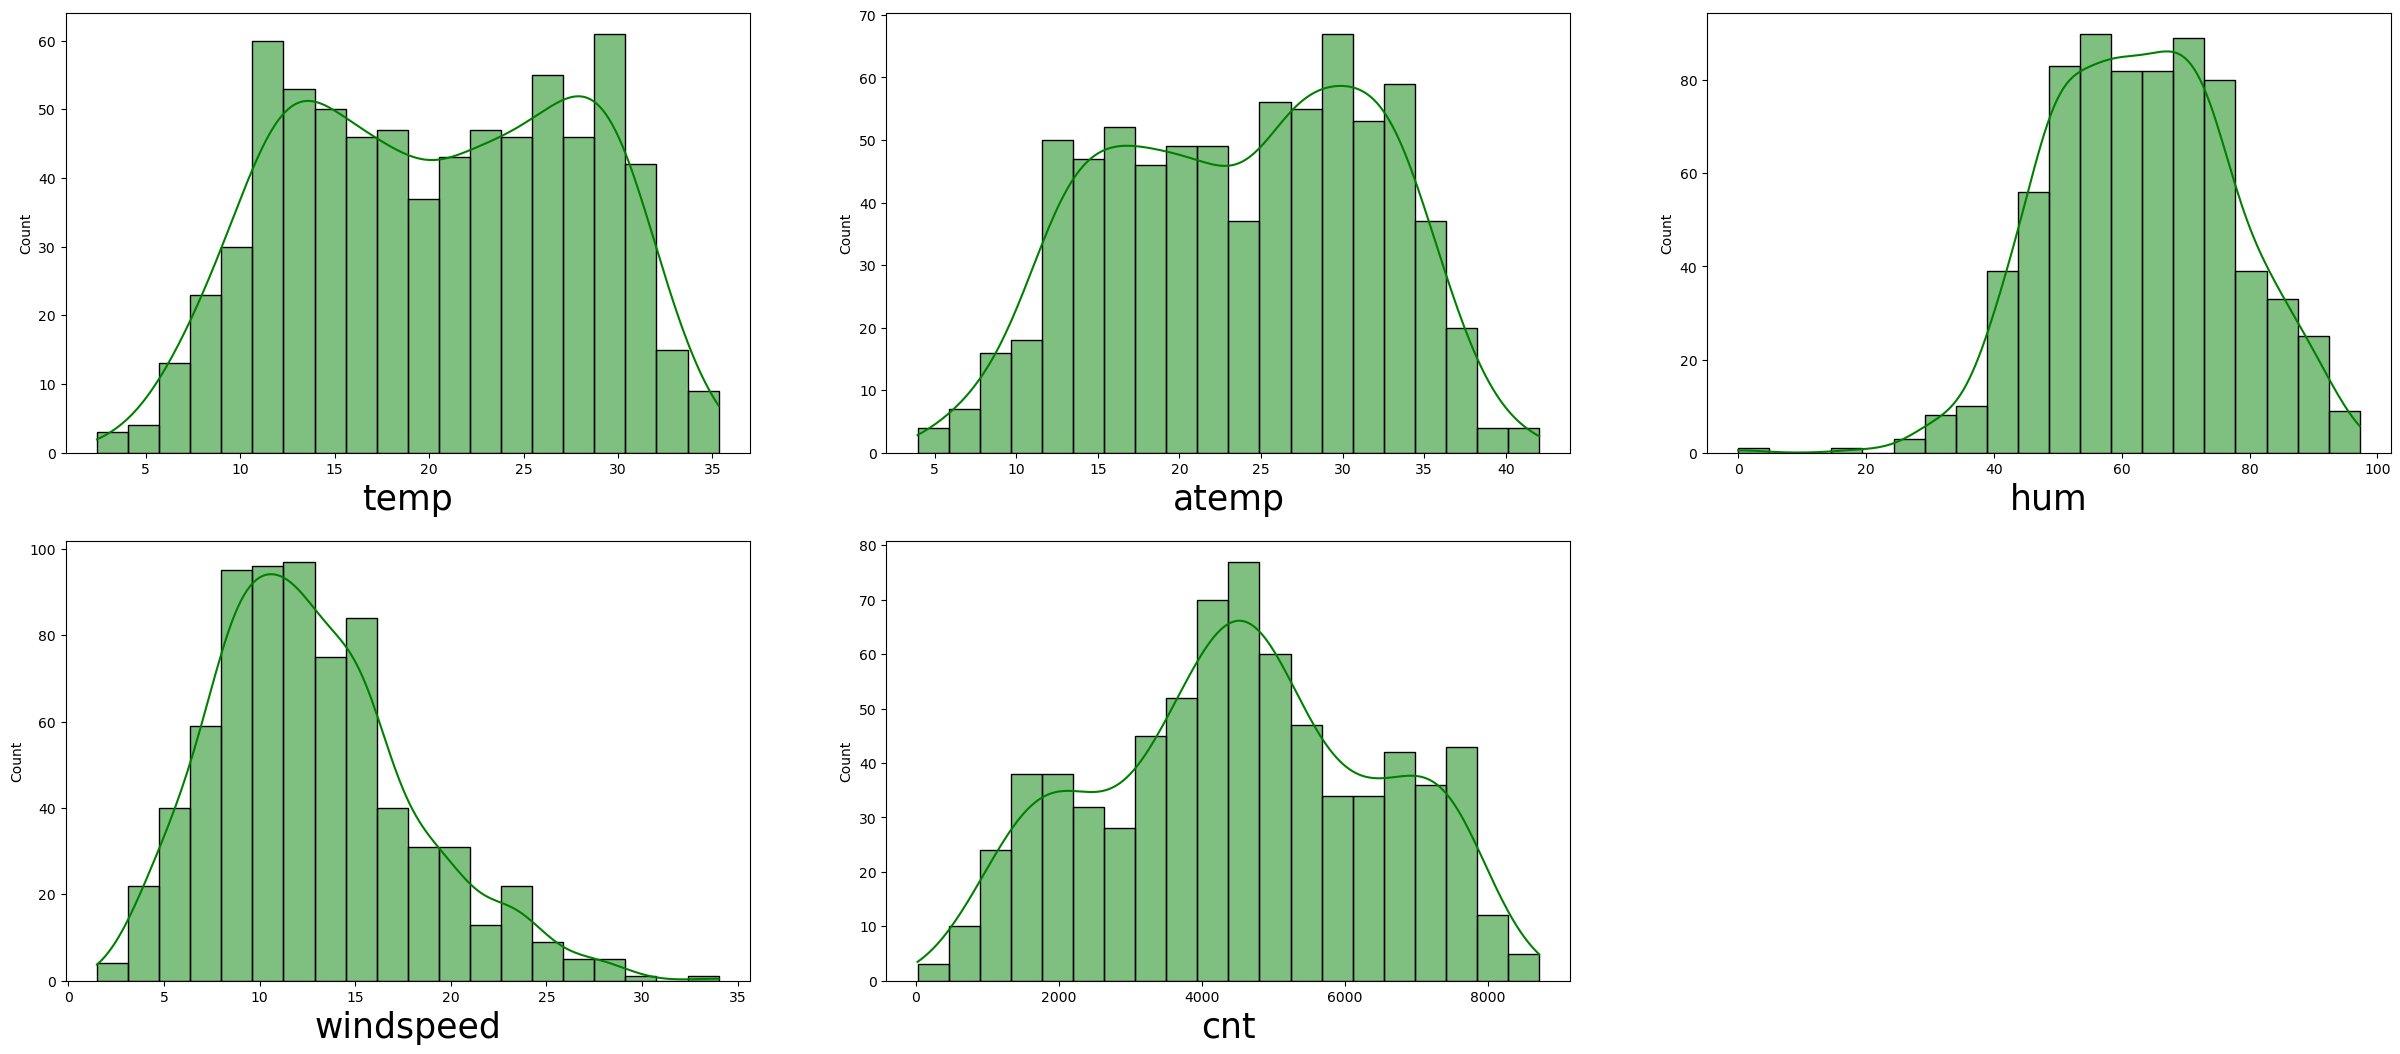

In [1340]:
i=1

plt.figure(figsize=(30,40))
for col in raw2:
    if (raw2[col].dtype!='object') & (col not in num_ex1):
        plt.subplot(6,3,i)
        sns.histplot(raw2[col],kde=True,color='green',bins=20)
        plt.xlabel(col,fontsize=25)
        i=i+1
plt.show()

### Observations :

<div class= 'alert alert-block alert-success'>
    
- Temaparature seems to have a higher distribution between 10-12 degree celsious & 30 degree celsious
- feeling temparature seems to have a higher distribution for 30 degree celsious 
- <b>By looking into temparature and feeling temparature we can say 30 degree celcious is the most occuring       tempartaure over all the years</b>    
- windspeed has its values mostly distributed between 7-11
- 50 and 70 is the highest distributed humidty values
- here windspeen and hum almost forms a normally distributed curve
- The variable count seems close to a normal distibution where most of the data distribution is on '5000'

</div>

# Bivariate Analysis

- Pair-plot for Year
- cnt vs categorical Variables

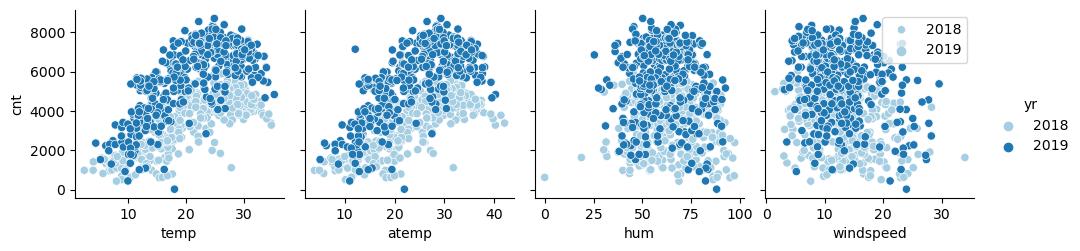

In [1341]:
num_col=['temp', 'atemp', 'hum', 'windspeed']

ax = sns.pairplot(x_vars=num_col, y_vars=['cnt'] 
                  , data=bike, hue='yr', palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation:

<div class='alert alert-block alert-success'>

- All the continous numeric variables seems to have an increase in their bike bookings in 2019 while comparing it with 2018
- Out of these numeric variable temp and atemp shows a linear relationship with bookings
    

★ temp,atemp shows some linear relationship with total booking hence it can be a good predictor variable for the model.

★ year shows some trend between the variables which can be a important parameter for the model.
    
    
    
</div>



In [1342]:
from tabulate import tabulate

def stat_chart(col):
    if col in num_col:
        bi_var = raw2.groupby(col)['cnt'].agg(['sum', 'median','count']).sort_values('sum',ascending = False)
        bi_var['%sum']=bi_var['sum']/raw2.cnt.sum()*100
        table = tabulate(round(bi_var,2), headers='keys', tablefmt='pretty')
        print('\n Statistics for {} :\n'.format(col))
        print(table,'\n ')
        
        print('Visualization for {} :'.format(col),'\n')

        if raw2[col].nunique()>5:
            plt.figure(figsize=(20,4))
        else:
            plt.figure(figsize=(20,4))
        plt.subplot(1,2,1)    
        ax=sns.barplot(x=col,y='cnt', data=raw2)
        for patch in ax.patches:
            patch.set_edgecolor('black')
        plt.subplot(1,2,2) 
        ax1=sns.boxplot(x=col,y='cnt', data=raw2)
        for patch in ax1.patches:
            patch.set_edgecolor('black')
        plt.show()
        

In [1343]:
stat_chart('season')

#### Observation:

<div class='alert alert-block alert-success'>

- Overall the highest the bike booking were happening in the Fall season which is <b>32%</b> of total booking of (2018 & 2019) with a <b>median > 5K bookings</b>
- The remaining bookings were happening in the Summer & Winter season with <b>27% & 25% </b> of total booking with a <b>median arround 5K</b>. 
- The remains of the total booking is <b>14%</b> which is booked during the spring season with a <b>median arround 2.2k. <b/>
    

★ Season shows some linear relationship with total booking hence it can be a good predictor variable for the model.
    
    
</div>



In [1344]:
stat_chart('mnth')

#### Observation:

<div class='alert alert-block alert-success'>

-  We have a consistent <b>(10%)</b> rental bookings per month, between <b>May to Sep </b> with a <b>median > 5k </b>bookings per month <b>except may month which has a median arround 5k</b>. 

★  mnth shows some linear relationship with total booking hence it can be a good predictor variable for the model.
    
</div>



In [1345]:
stat_chart('holiday')

#### Observations:
<div class='alert alert-block alert-success'>
    
- <b>97%</b> of total bike bookings are happeing in <b>non-holiday's</b> with a median of arround <b>4.5K</b>.
    
    
</div>

In [1346]:
stat_chart('weekday')

#### Observation:

<div class='alert alert-block alert-success'>

-  We have rental bookings > <b>(14%)</b> per day, from <b>tuesday to friday </b> with a <b>median > 4.5k </b>bookings per day.
- On monday and saturday we have arround <b>13%</b> of total bookings with a media close to <b>4.4K</b>
    
</div>

In [1347]:
stat_chart('workingday')

#### Observation:

<div class='alert alert-block alert-success'>

- Almost 70% of the total bookings were happening in working days with a median of 4.5k.
    
</div>

In [1348]:
stat_chart('weathersit')

#### Observation:

<div class='alert alert-block alert-success'>

-  68% of the Total bookings were happening during Clear sky with a median arround 4.8K.
- 30% of the Total bookings were happening during misty weather with a median of 4k.
- only 1.1% of bikes were booked during light rains.

★  Weathersit shows some linear relationship with total booking hence it can be a good predictor variable for the model.

    
</div>

# Multiple Linear Regression Model

To build an MLR model for the given problem statement we have to follow the below steps:

1. Binary Encoding (if applicable)
1. Creating Dummy variables (if applicable)
1. Splitting the Data in to test and training data
1. Identify the correlation and multicollinearity between variables
1. Rescaling the features
1. Divide the train dataset in to X and y (dependant and independant variables)
1. Feature Selection (RFE -Recursive Feature Elimination)
1. Building Stats Model for Validating RFE
1. Buidling Model on Train Dataset
1. Residual Analysis on the Raining Data
1. Making Predictions using Test data
1. Model Evaluation and Residual Analysis on Test Data
1. Final Conclusion



<div class='alert alert-block alert-success'>

Binary Encoding is not required for the current model.

</div>

#### Processing the dataset for Building an MLR model:

In [1349]:
#dropping dteday since we already have the required date parameters
bike=raw2.drop('dteday',axis=1)

In [1350]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,no,saturday,no,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no,sunday,no,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no,monday,yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no,tuesday,yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no,wednesday,yes,clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables :

In [1351]:
#Creating Dummy Variables and dropping the first variable, total dummy variable n is n-1.
bike_new=pd.get_dummies(bike, drop_first=True)
print('Total number of variables after creating dummy variables is {}'.format(len(bike_new.columns)))

Total number of variables after creating dummy variables is 30


In [1352]:
#Getting ionformation about the Dataset after creating dummy variables
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   730 non-null    float64
 1   atemp                  730 non-null    float64
 2   hum                    730 non-null    float64
 3   windspeed              730 non-null    float64
 4   cnt                    730 non-null    int64  
 5   season_spring          730 non-null    uint8  
 6   season_summer          730 non-null    uint8  
 7   season_winter          730 non-null    uint8  
 8   yr_2019                730 non-null    uint8  
 9   mnth_aug               730 non-null    uint8  
 10  mnth_dec               730 non-null    uint8  
 11  mnth_feb               730 non-null    uint8  
 12  mnth_jan               730 non-null    uint8  
 13  mnth_jul               730 non-null    uint8  
 14  mnth_jun               730 non-null    uint8  
 15  mnth_m

### Test and Train Split of Dataset:

Now the given sample dataset will be split in to test and train datasets

In [1353]:
# Creating Test and Training Dataset Split
bike_train, bike_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [1354]:
print('Total Records in training Dataset :', bike_train.shape[0])
print('Total Records in test Dataset :', bike_test.shape[0])

Total Records in training Dataset : 510
Total Records in test Dataset : 219


In [1355]:
bike_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,holiday_yes,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_yes,weathersit_light_rain,weathersit_mist
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Correlation and Multicollinearity Check

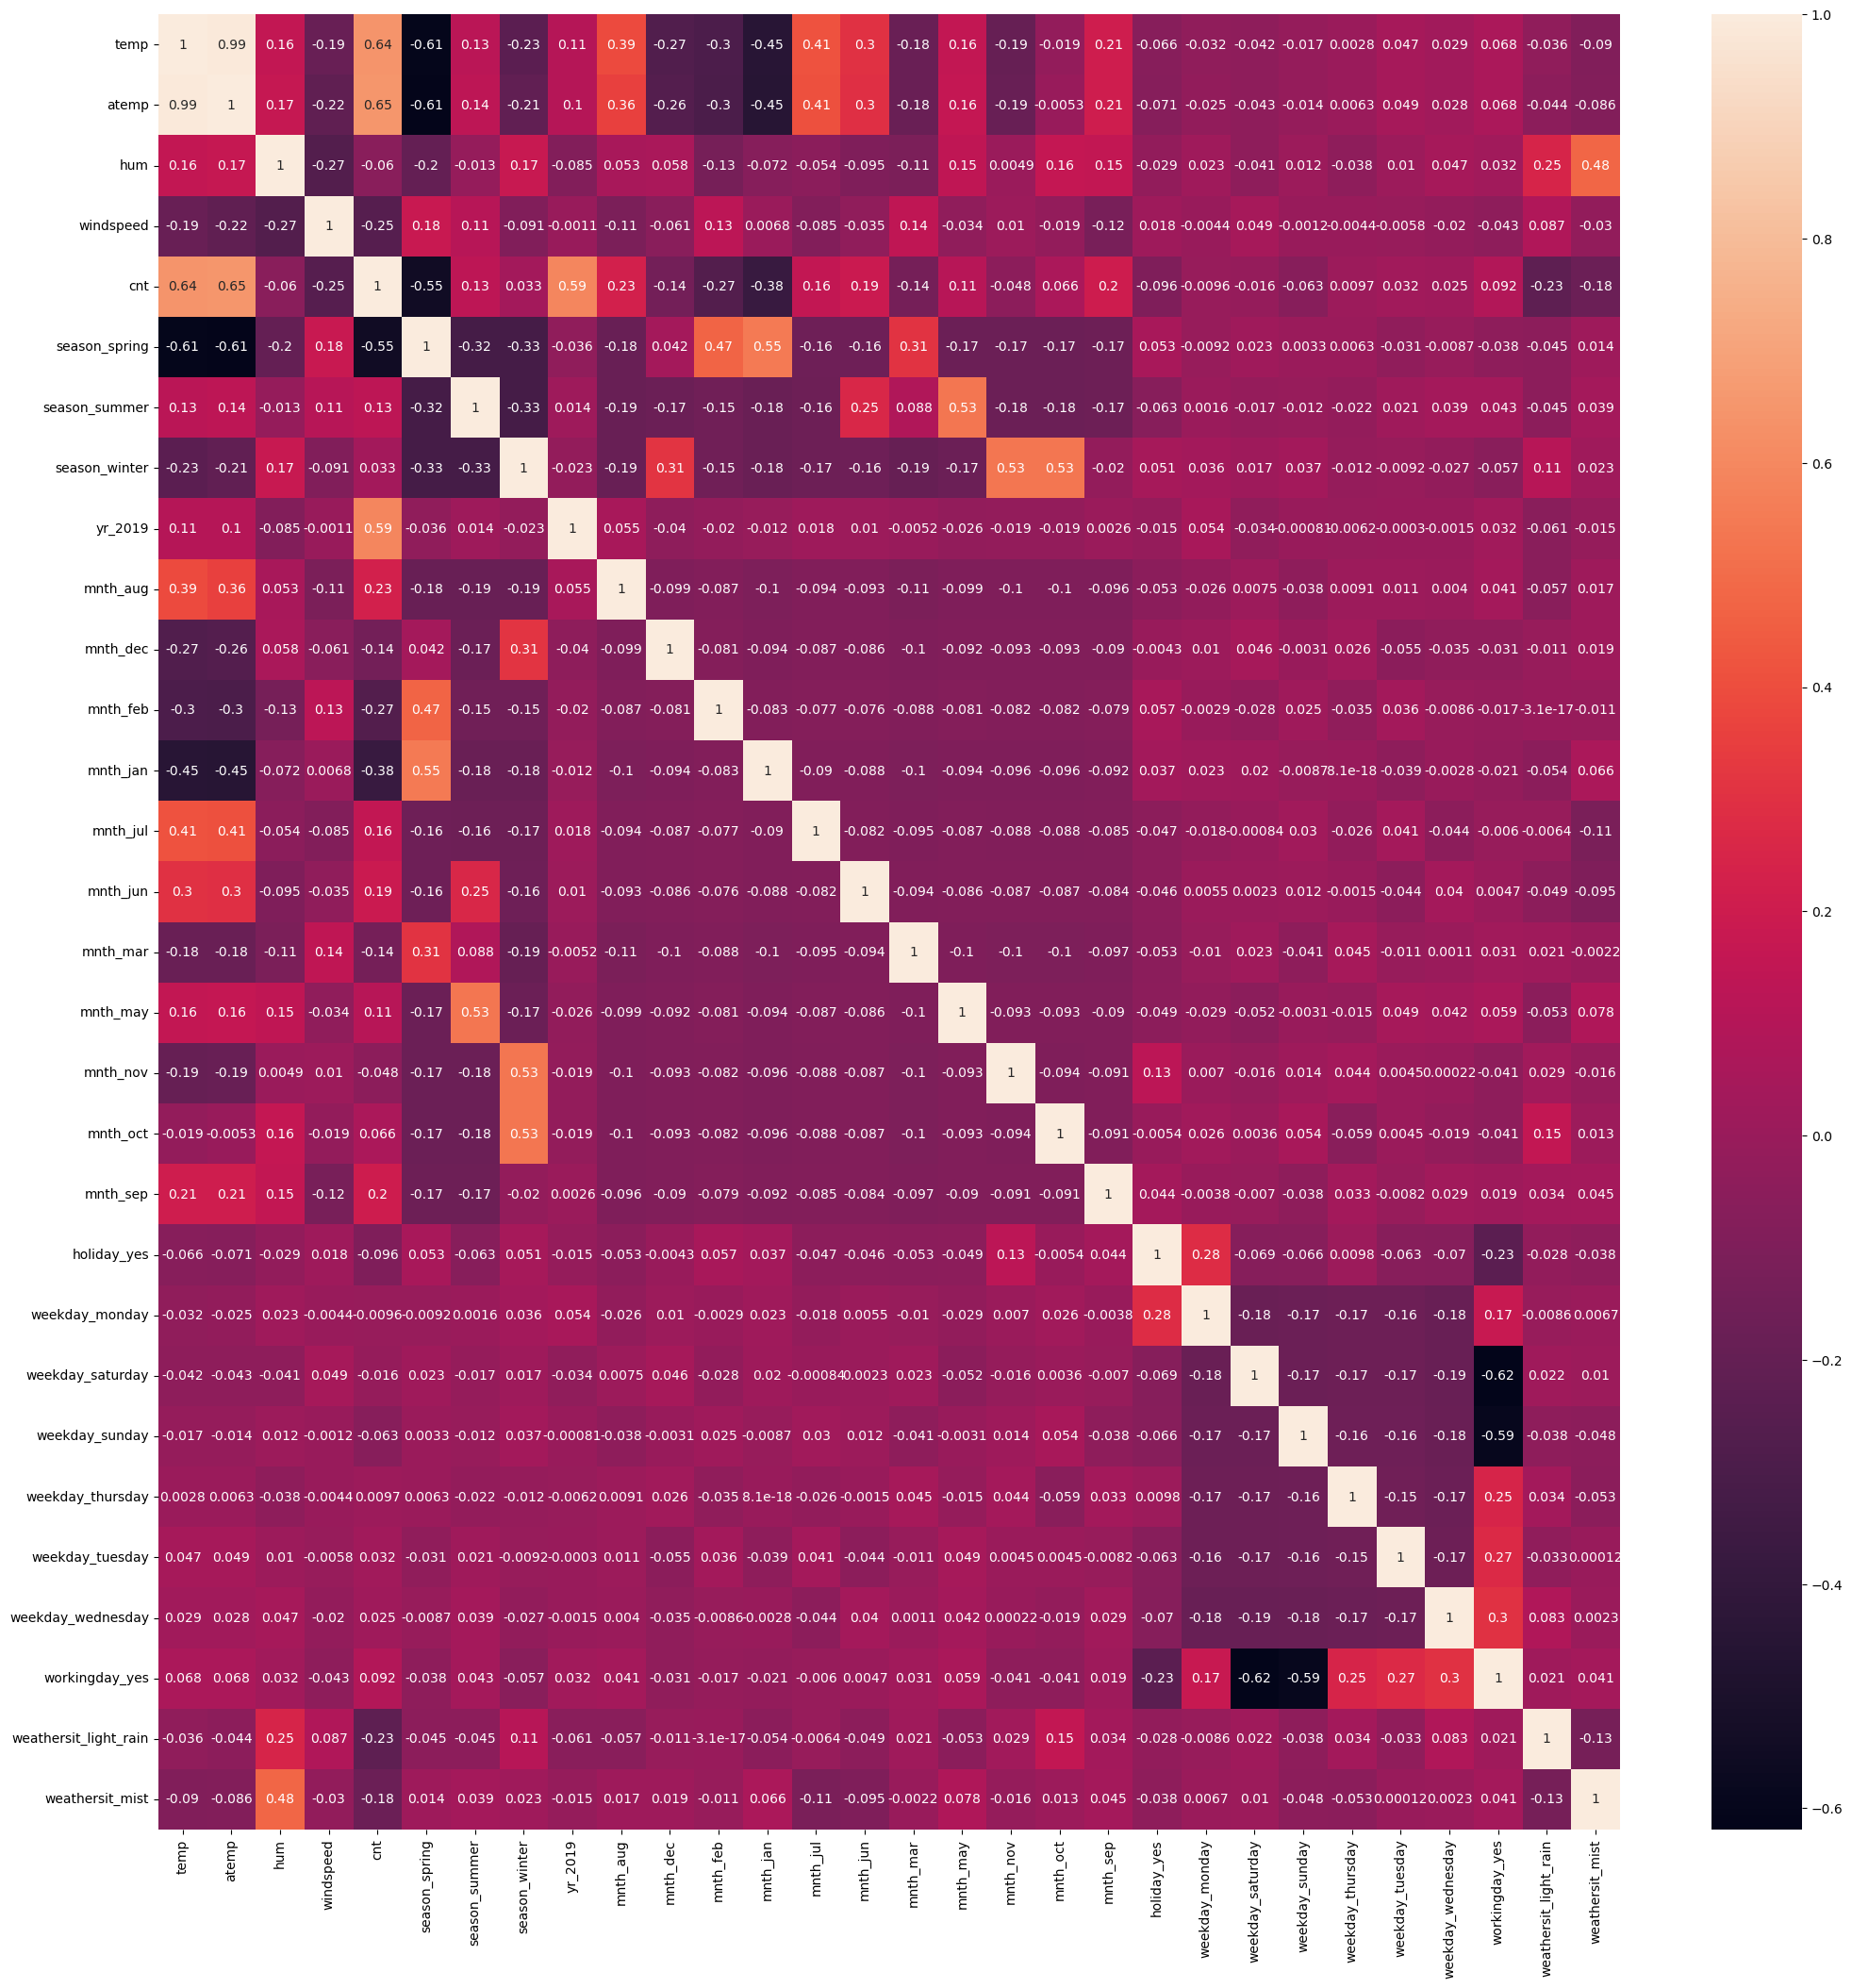

In [1356]:
plt.figure(figsize=(25,25))
sns.heatmap(bike_train.corr(),annot=True)
plt.show()


#### Observation:

<div class='alert alert-block alert-success'>

The above heat map shows the correlation of variables over the other which will be used further in the model to identify multicollinearity across variables.
    
- temp and atemp has very high correlation value of 0.99.
- The variable "Workingday" exhibits a strong negative correlation with Saturday and Sunday.
- There is a negative correlation between "Spring" and "cnt" (the target variable).
- The variables "emp", "atemp", and "yr" show a strong correlation with "cnt".
- Misty weather and humidity are correlated.
- Different months are correlated with specific weather conditions.

    
</div>

### Rescaling/Transformation of the Features:

In [1357]:
scaler = MinMaxScaler()

In [1358]:
#Check Numeric values before applying scalar
bike_train[['temp', 'atemp', 'hum', 'windspeed','cnt']].head()

,temp,atemp,hum,windspeed,cnt
653,19.201653,23.0423,55.8333,12.208807,7534
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220


In [1359]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [1360]:
#Check Numeric values after applying scalar
bike_train[['temp', 'atemp', 'hum', 'windspeed','cnt']].head()

,temp,atemp,hum,windspeed,cnt
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


#### Generating Statistics about all the numeric variable after Scaling the variables:

In [1361]:
bike_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,holiday_yes,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_yes,weathersit_light_rain,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.025490,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building and Training Model:

Splitting the train Data in to Y and X variable

In [1362]:
#Creating Depedndent and Independent variables
y_train = bike_train.pop('cnt')
X_train = bike_train

In [1363]:
len(X_train.columns)

29

In [1364]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Feature Selection

<div class='alert alert-block alert-success'>

There are multiple techniques available to select the best features to build a model out of them. We will be using RFE (recursive feature elimination) since we have to select the independent or X variables from a list of 30 variables.
    
</div>

In [1365]:
# Running RFE with the output number of the variable equal to 15
# Importing RFE and LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [1366]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_monday', False, 9),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 5),
 ('weekday_thursday', False, 11),
 ('weekday_tuesday', False, 10),
 ('weekday_wednesday', False, 12),
 ('workingday_yes', False, 2),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1)]

In [1367]:
#Storing the select top 15 vairables in a list

col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'holiday_yes', 'weekday_saturday', 'weathersit_light_rain',
       'weathersit_mist'],
      dtype='object')

In [1368]:
#Checking the Eliminated columns
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_monday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'workingday_yes'],
      dtype='object')

In [1369]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [1370]:
#Function to Build Manual stats model

def statsmodel(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1375]:
statsmodel(X_train_rfe)

,Features,VIF
1,hum,24.57
0,temp,16.88
2,windspeed,4.10
4,season_winter,2.98
3,season_spring,2.94
14,weathersit_mist,2.26
5,yr_2019,2.07
9,mnth_nov,1.82
7,mnth_jan,1.75
6,mnth_dec,1.54


#### Creating and Fititng Model:

In [1376]:
#Adding constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Creating and Fitting model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

#Summary of Linear regression model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.93e-188
Time:                        22:53:33   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

## Insight: As hum has the highest VIF value, we will remove the variable next

In [1378]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [1379]:
statsmodel(X_train_new)

,Features,VIF
0,temp,4.70
1,windspeed,4.08
3,season_winter,2.54
2,season_spring,2.37
4,yr_2019,2.07
8,mnth_nov,1.80
6,mnth_jan,1.65
13,weathersit_mist,1.53
5,mnth_dec,1.46
7,mnth_jul,1.36


In [1380]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.93e-188
Time:                        22:55:22   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

Lets remove Weekday Saturday which ahs the highest P-Value

In [1381]:
X_train_new = X_train_new.drop(['weekday_saturday'], axis = 1)

In [1382]:
statsmodel(X_train_new)

,Features,VIF
0,temp,4.67
1,windspeed,4.05
3,season_winter,2.54
2,season_spring,2.36
4,yr_2019,2.06
8,mnth_nov,1.80
6,mnth_jan,1.65
12,weathersit_mist,1.53
5,mnth_dec,1.46
7,mnth_jul,1.36


In [1383]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.08e-186
Time:                        23:01:33   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

### Next we will remove mnth_nov due to high P-Value

In [1384]:
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)
# Run the function to calculate VIF for the new model
statsmodel(X_train_new)

,Features,VIF
0,temp,4.63
1,windspeed,4.00
2,season_spring,2.36
4,yr_2019,2.06
3,season_winter,1.64
6,mnth_jan,1.64
11,weathersit_mist,1.53
7,mnth_jul,1.36
5,mnth_dec,1.29
8,mnth_sep,1.20


In [1385]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.02e-186
Time:                        23:03:53   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

### Removing mnth_dec due to high-Pvalue

In [1388]:
X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)
# Run the function to calculate VIF for the new model


KeyError: "['mnth_dec'] not found in axis"

In [1389]:
statsmodel(X_train_new)

,Features,VIF
0,temp,4.63
1,windspeed,4.00
2,season_spring,2.25
4,yr_2019,2.06
5,mnth_jan,1.60
10,weathersit_mist,1.53
3,season_winter,1.40
6,mnth_jul,1.36
7,mnth_sep,1.20
9,weathersit_light_rain,1.08


In [1390]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.13e-186
Time:                        23:09:25   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

### Removing mnth_dec due to high-Pvalue

In [1391]:
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)
# Run the function to calculate VIF for the new model


In [1392]:
statsmodel(X_train_new)

,Features,VIF
0,temp,4.60
1,windspeed,4.00
4,yr_2019,2.06
2,season_spring,1.65
9,weathersit_mist,1.51
3,season_winter,1.40
5,mnth_jul,1.35
6,mnth_sep,1.20
8,weathersit_light_rain,1.08
7,holiday_yes,1.04


In [1393]:
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.16e-186
Time:                        23:11:01   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

### Observations

The model appears promising as there is minimal multicollinearity among the predictors, and the p-values for all predictors indicate significance. Currently, we will adopt this as the final model, unless the test data metrics significantly deviate from these results.

# Model Interpretation

#### Hypothesis Testing :


- H0:B1=B2=B3=B4...=Bn=0 

- H1: at least one Bi!=0

- const             0.082768
- yr                0.230252
- workingday        0.043963
- temp              0.564438
- windspeed        -0.154241
- W2_Summer         0.082300
- W4_Winter         0.129186
- Sep               0.094832
- Light_rainsnow   -0.307082
- Misty            -0.074921
- Saturday          0.057838

## Observations : 
    
Based on the summary of the lr6 model, it is clear that none of our coefficients are equal to zero. As a result, we reject the null hypothesis.

In [ ]:
F-Staitsics :

F-Statistics is used for testing the overall significance of the Model. 
The higher the F-Statistics, the more significant the Model is.

F-Statistics : 233.6 
Prob (F-statistic): 4.48e-181